<a href="https://colab.research.google.com/github/5210411395-Vito-Dwi-Yanto/Preprocessing_ML/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Memuat Data**

In [1]:
import pandas as pd                                       # masukan libraries pandas untuk memproses data
import numpy as np                                        # NumPy (Numerical Python) adalah library Python yang menyediakan fungsi memudahkan kita melakukan perhitungan saintifik
from sklearn.model_selection import train_test_split      # untuk membagi array atau matriks menjadi himpunan bagian acak untuk data latih dan uji
import matplotlib.pyplot as plt                           # suatu library python untuk melakukan visualisasi data seperti membuat plot grafik untuk satu sumbu atau lebih.
from sklearn.cluster import KMeans                        # library python yang menyediakan banyak algoritma pembelajaran untuk regresi, pengelompokan, dan klasifikasi (K-Means)
from sklearn.metrics import silhouette_score              # untuk kumpulan data digunakan untuk mengukur rata-rata Koefisien Silhouette untuk setiap sampel
from sklearn.metrics import classification_report         # untuk memuat hasil laporan klasifikasi
import joblib                                             # paket yang dapat dengan mudah mengubah kode Python menjadi mode komputasi paralel dan meningkatkannya.

data = pd.read_csv('/content/House Price India.csv')      # Membaca dataset/memmuat data

data.head()                                               # Menampilkan isi data set teratas 

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


# **Memilih Fitur**

Semua fitur yang ada pada data semuanya berpengatuh jadi tidak ada yang tidak relevan maka semua fitur harus digunakan. Untuk itu ada gunaka satu fitur target yaitu Price

In [2]:
data.columns            #Melihat colom/attribut apa saja yang ada pada data set

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

# **Menangani Nilai Yang Hilang**

Disini untuk mengecek apakah ada datang yang hilang, jika ada data yang hilang maka harus dihapus atau diubah. Karena pada dataset ini tidak ada missing values, jadi tidak perlu untuk menghapus atau mengubah datanya.

In [3]:
missing_values = data.isnull().sum()                # Mengecek missing values dalam dataset is null untuk mengkonfirmasi jika ada data yang missing(hilang)
print(missing_values)                               # Menjalankan hasil mising value

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

# **Mengubah data kategorikal menjadi numerik**

karena dataset yang digunakan sudah numerik maka tidak perlu mengubahnya.

In [4]:
data.dtypes    # Melihat data kategorikal 

id                                         int64
Date                                       int64
number of bedrooms                         int64
number of bathrooms                      float64
living area                                int64
lot area                                   int64
number of floors                         float64
waterfront present                         int64
number of views                            int64
condition of the house                     int64
grade of the house                         int64
Area of the house(excluding basement)      int64
Area of the basement                       int64
Built Year                                 int64
Renovation Year                            int64
Postal Code                                int64
Lattitude                                float64
Longitude                                float64
living_area_renov                          int64
lot_area_renov                             int64
Number of schools ne

# **Memisahkan fitur target**
 
Mengambil fitur targer yaitu Price

In [6]:
X = data.drop(['Price'], axis=1)            # Membuat variabel X untuk membuat data traning dan memisahkan atribut pada data set

y = data['Price']                           # Membuat variabel y untuk membuat data traning dan mengambil data set

# **Memisahkan data menjadi set pelatihan dan pengujian**

train = data pelatihan test = data testing untuk melatih model dengan data yang telah diketahui dan menguji kinerjanya pada data yang belum diketahui

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)      # Membuat data training dan data testing

X_train.shape, X_test.shape                                                   # cek bentuk dari X_train and X_test

((11696, 22), (2924, 22))

# **Membuat metode K-Means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

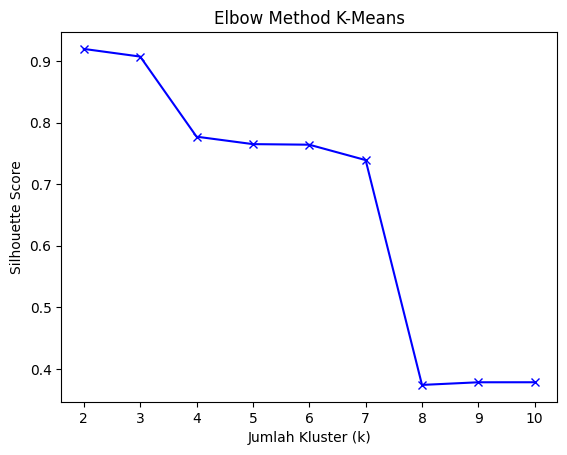

In [12]:
# Inisialisasi daftar untuk menyimpan skor silhouette 
# untuk mengevaluasi kualitas cluster yang dibuat menggunakan algoritma clustering seperti K-Means
silhouette_scores = []

k_values = range(2, 11) # Menentukan rentang jumlah kluster yang akan diuji

# Melakukan K-means clustering untuk setiap jumlah kluster
for k in k_values:

    kmeans = KMeans(n_clusters=k)                 # Inisialisasi KMeans object
    
    kmeans.fit(X)                                 # Melatih model K-means clustering
    
    y_pred = kmeans.predict(X)                    # Prediksi kluster untuk setiap sampel
    
    # Menghitung skor silhouette
    silhouette_avg = silhouette_score(X, y_pred)
    silhouette_scores.append(silhouette_avg)

# Menjalankan Plot elbow curve
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Jumlah Kluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method K-Means')
plt.show()

# **Menyiman model hasil K-Means**

In [10]:
joblib.dump(kmeans, 'kmeans_model.pkl')     # Menyimpan model K-means ke file menggunakan joblib

print("Model K-means telah disimpan")       # Menampilkan pesan setelah menyimpan model

Model K-means telah disimpan
